In [233]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [235]:
import seaborn as sns
data=sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Inspect Data

In [238]:
data.shape

(891, 15)

In [240]:
data.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [244]:
data.describe



<bound method NDFrame.describe of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult

In [246]:
data = data.iloc[:,1:] #.iloc stands for "integer location.
#used to select rows and columns of data using their index positions"
data

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Dropping duplicate rows if any

In [249]:

duplicated_rows=data.duplicated() 
duplicated_rows

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [251]:
duplicated_rows.sum()

107

In [253]:
# code snippet to select non duplicate rows
data = data[~duplicated_rows]

In [255]:
data.shape

(784, 14)

## Checking missing values

In [258]:
data.isna()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [260]:
data.isna().sum() #missing values of each column

pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

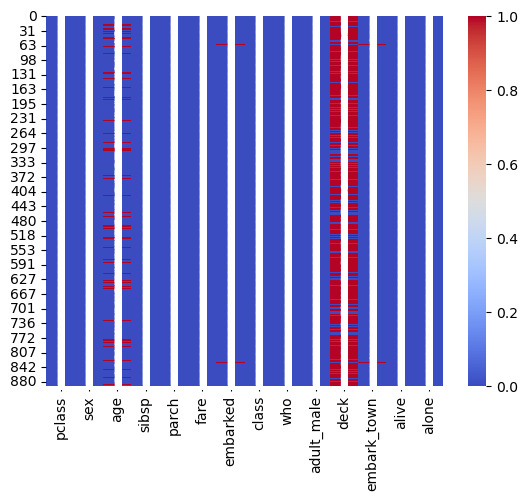

In [262]:
sns.heatmap(data.isna(),annot=True, cmap='coolwarm')
plt.show()

In [263]:
data.isna().sum()/data.shape[0] +100 #percentage value calculation

pclass         100.000000
sex            100.000000
age            100.135204
sibsp          100.000000
parch          100.000000
fare           100.000000
embarked       100.002551
class          100.000000
who            100.000000
adult_male     100.000000
deck           100.742347
embark_town    100.002551
alive          100.000000
alone          100.000000
dtype: float64

## dropping rows with missing values
* this can be done where there is lot of data point available and few rows having missing value

In [265]:
data = data.dropna()
data#default = inplace=False

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [266]:
# define in whic column to look for NA values
data.dropna(subset=["class","who"],inplace=True)
data

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


## splitting numerical and categorical columns

In [268]:
num_df = data.select_dtypes(include="number")
cat_df = data.select_dtypes(include="object_")
num_df

,pclass,age,sibsp,parch,fare
1,1,38.0,1,0,71.2833
3,1,35.0,1,0,53.1000
6,1,54.0,0,0,51.8625
10,3,4.0,1,1,16.7000
11,1,58.0,0,0,26.5500
...,...,...,...,...,...
871,1,47.0,1,1,52.5542
872,1,33.0,0,0,5.0000
879,1,56.0,0,1,83.1583
887,1,19.0,0,0,30.0000


In [269]:
cat_df

,sex,embarked,who,embark_town,alive
1,female,C,woman,Cherbourg,yes
3,female,S,woman,Southampton,yes
6,male,S,man,Southampton,no
10,female,S,child,Southampton,yes
11,female,S,woman,Southampton,yes
...,...,...,...,...,...
871,female,S,woman,Southampton,yes
872,male,S,man,Southampton,no
879,female,C,woman,Cherbourg,yes
887,female,S,woman,Southampton,yes


In [270]:
print("Numerical columns are")
num_cols = num_df.columns.tolist()
print(num_cols)
print("Categorical columns are")
cat_cols = cat_df.columns.tolist()
print(cat_cols)

Numerical columns are
['pclass', 'age', 'sibsp', 'parch', 'fare']
Categorical columns are
['sex', 'embarked', 'who', 'embark_town', 'alive']


### check histograms of numerical columns for data imputation

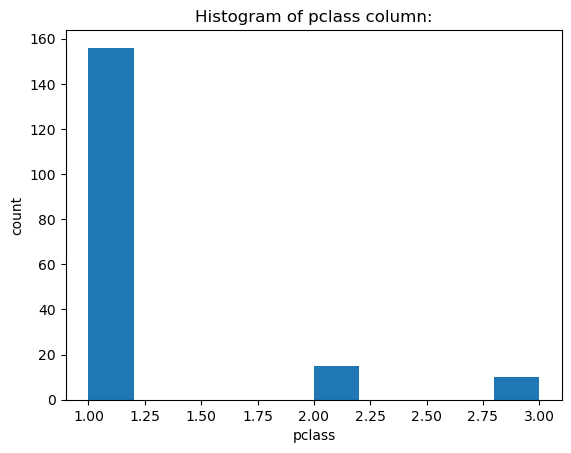

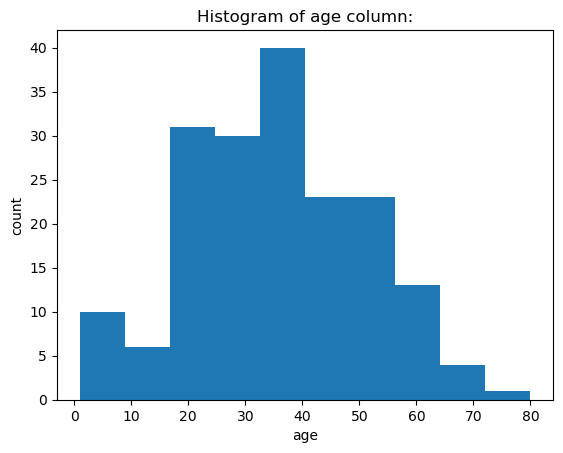

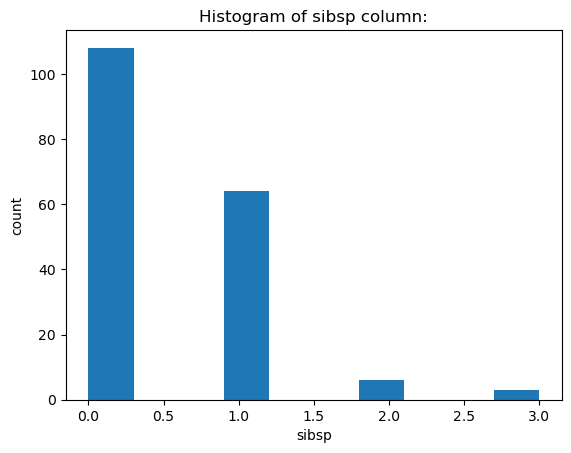

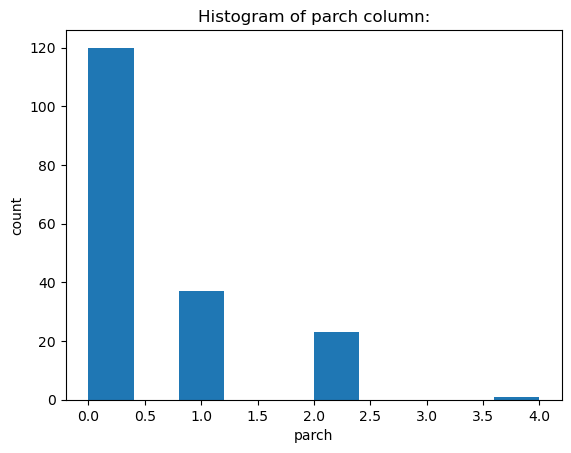

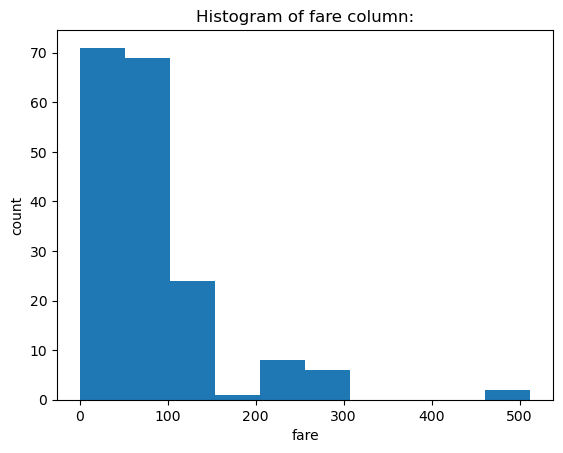

In [272]:
for col in num_cols:
    plt.hist(num_df[col])
    plt.title("Histogram of {} column:".format(col))
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

### check histograms of categorical columns for data imputation

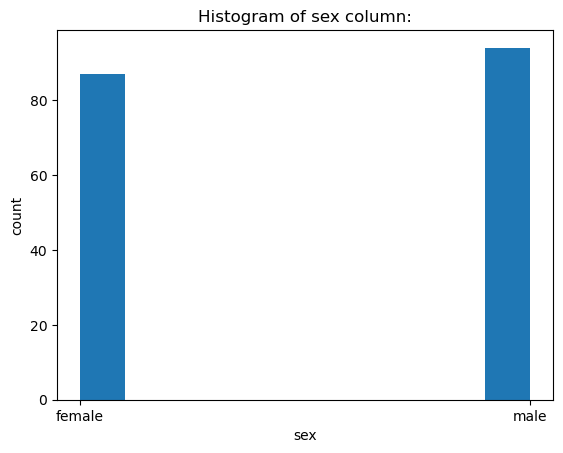

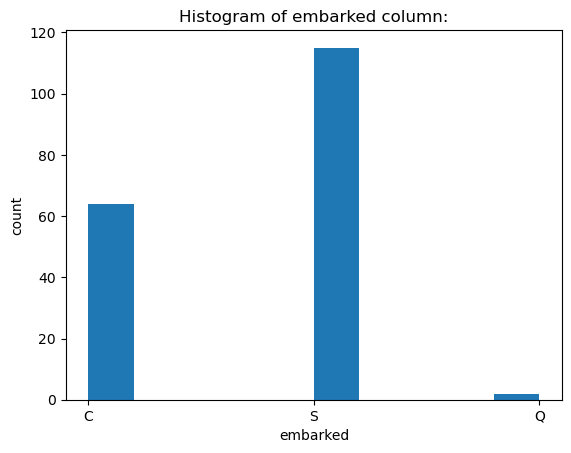

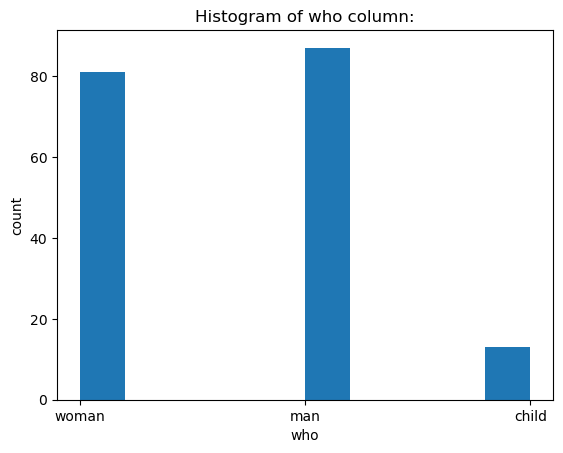

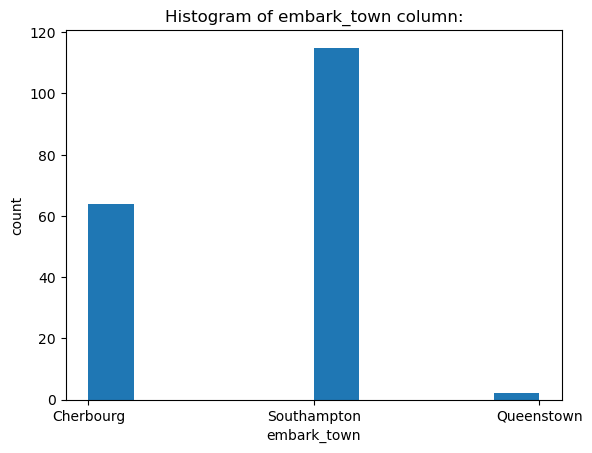

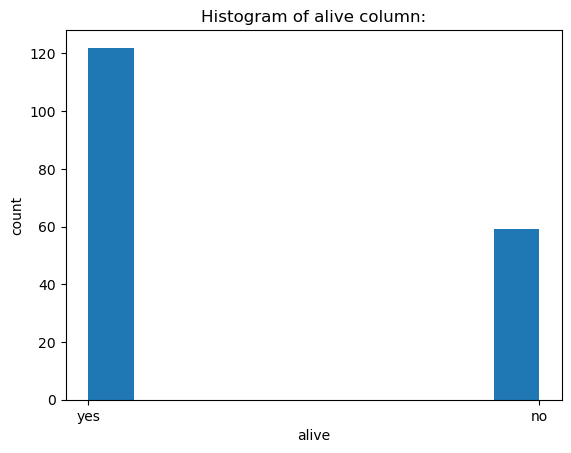

In [274]:
for col in cat_cols:
    plt.hist(cat_df[col])
    plt.title("Histogram of {} column:".format(col))
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

## filling missing value for numerical columns

In [276]:
for col in num_cols:
    num_df[col]= num_df[col].fillna(num_df[col].median())
    

## Why Use Median?

* The median is unaffected by outliers and represents the central tendency of the data.
* Use this approach when your dataset has numerical columns with missing values, and you want to preserve the overall distribution.
* The median works well for datasets that are skewed, where the values are not symmetrically distributed. In such cases, the mean might not reflect the typical value of the data, but the median still does.

In [284]:
#sanity check to see if missing values are filling
num_df.isna().sum()

pclass    0
age       0
sibsp     0
parch     0
fare      0
dtype: int64

## fillling missing values for categorical columns

In [286]:
for col in cat_cols:
    cat_df[col]=cat_df[col].fillna(cat_df[col].mode()[0])

In [287]:
cat_df.isna().sum()

sex            0
embarked       0
who            0
embark_town    0
alive          0
dtype: int64

In [288]:
cat_df[col].mode()

0    yes
Name: alive, dtype: object

## Why Use Mode for Categorical Data?
* Represents the Most Common Category: The mode is often the most meaningful choice for filling missing values in categorical columns, as it represents the most common or frequent category in the data.
## When to Use Mode for Imputation:
 * Categorical Data
 * Skewed Categorical Data
 * Nominal and Ordinal Data
 * : If there are multiple modes (i.e., the column has more than one most frequent value), mode()[0] takes the first mode by default. 

## Recombine both Numerical and Categorical Columns

In [291]:
data = pd.concat((num_df,cat_df),axis=1)

* The axis parameter determines the direction of concatenation:
* axis=0: Concatenate along rows (vertical concatenation, adding more rows).
* axis=1: Concatenate along columns (horizontal concatenation, adding more columns).

## checking duplicate columns

In [294]:
dup_cols = data.columns.duplicated()
#remove duplicate columns if any
data = data.loc[:,~dup_cols]
data

,pclass,age,sibsp,parch,fare,sex,embarked,who,embark_town,alive
1,1,38.0,1,0,71.2833,female,C,woman,Cherbourg,yes
3,1,35.0,1,0,53.1000,female,S,woman,Southampton,yes
6,1,54.0,0,0,51.8625,male,S,man,Southampton,no
10,3,4.0,1,1,16.7000,female,S,child,Southampton,yes
11,1,58.0,0,0,26.5500,female,S,woman,Southampton,yes
...,...,...,...,...,...,...,...,...,...,...
871,1,47.0,1,1,52.5542,female,S,woman,Southampton,yes
872,1,33.0,0,0,5.0000,male,S,man,Southampton,no
879,1,56.0,0,1,83.1583,female,C,woman,Cherbourg,yes
887,1,19.0,0,0,30.0000,female,S,woman,Southampton,yes


* loc[]: This is used for label-based indexing, allowing you to select rows and columns by their labels.
* The first argument (:) selects all rows.
* The second argument (~dup_cols) selects only the columns that are not duplicates.
* The ~ (tilde) is a negation operator, so it inverts the True/False values in dup_cols, selecting columns where the value is False (i.e., columns that are not duplicates).

## checking duplicate columns visually


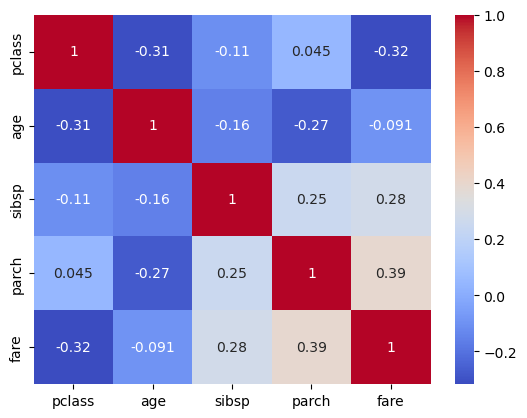

In [297]:
sns.heatmap(num_df.corr(),annot=True, cmap= 'coolwarm')
plt.show()

## Outlier Handling

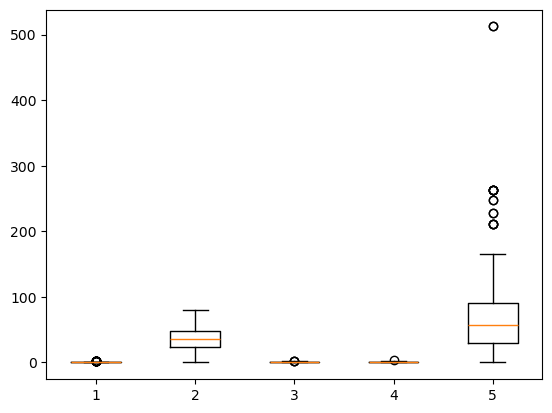

In [299]:
plt.boxplot(num_df)
plt.show()

In [300]:
def remove_outliers(df,column_name):
    q1= df[column_name].quantile(0.25)
    q3= df[column_name].quantile(0.75)
    iqr = q3-q1
    upper_bound = q1 + 1.5 * iqr
    lower_bound = q3 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper = upper_bound)
    df[column_name] = df[column_name].clip(lower = lower_bound)
    return df[column_name]

In [301]:
for col in num_cols:
    num_df[col] = remove_outliers(num_df,col)

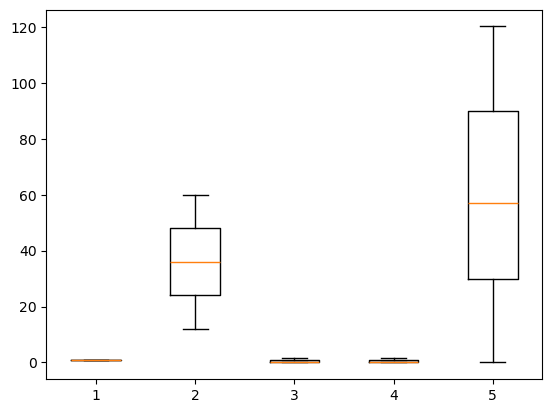

In [302]:
plt.boxplot(num_df)
plt.show()

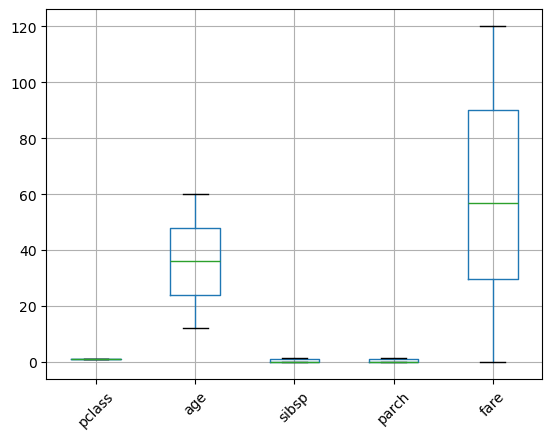

In [303]:
num_df.boxplot()
plt.xticks(rotation = 45)
plt.show()

## Data Imbalance

In [305]:
data['embark_town'].value_counts()

embark_town
Southampton    115
Cherbourg       64
Queenstown       2
Name: count, dtype: int64

## plot class imbalance

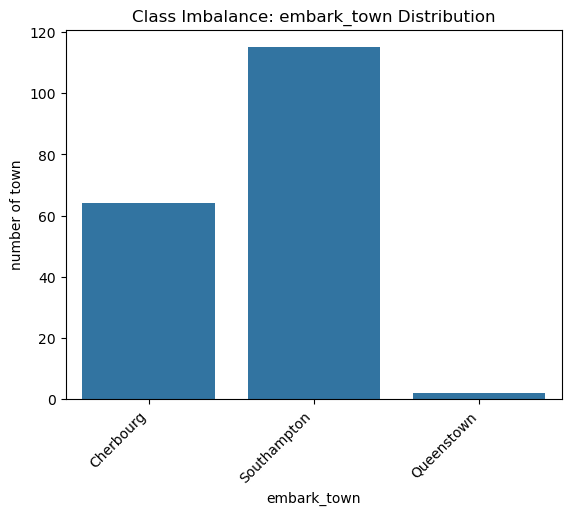

In [307]:
sns.countplot(x='embark_town',data=data)
plt.title('Class Imbalance: embark_town Distribution')
plt.xlabel('embark_town')
plt.ylabel('number of town')
plt.xticks(rotation = 45, ha='right')
plt.show()

In [308]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [309]:
X=data.drop('embark_town', axis=1)
y = data['embark_town']
oversampler = RandomOverSampler(random_state = 42)
X_resampled,y_resampled = oversampler.fit_resample(X,y)

In [310]:
X_resampled

,pclass,age,sibsp,parch,fare,sex,embarked,who,alive
0,1,38.0,1,0,71.2833,female,C,woman,yes
1,1,35.0,1,0,53.1000,female,S,woman,yes
2,1,54.0,0,0,51.8625,male,S,man,no
3,3,4.0,1,1,16.7000,female,S,child,yes
4,1,58.0,0,0,26.5500,female,S,woman,yes
...,...,...,...,...,...,...,...,...,...
340,1,33.0,1,0,90.0000,female,Q,woman,yes
341,1,44.0,2,0,90.0000,male,Q,man,no
342,1,44.0,2,0,90.0000,male,Q,man,no
343,1,33.0,1,0,90.0000,female,Q,woman,yes


In [311]:
X_resampled.shape

(345, 9)

# Create a new balanced dataframe

In [313]:
balanced_data = pd.DataFrame(X_resampled,columns=X.columns)
balanced_data['embark_town'] = y_resampled

y_resampled

0        Cherbourg
1      Southampton
2      Southampton
3      Southampton
4      Southampton
          ...     
340     Queenstown
341     Queenstown
342     Queenstown
343     Queenstown
344     Queenstown
Name: embark_town, Length: 345, dtype: object

# check the class distribution after resampling

In [315]:
print(balanced_data['embark_town'].value_counts())

embark_town
Cherbourg      115
Southampton    115
Queenstown     115
Name: count, dtype: int64


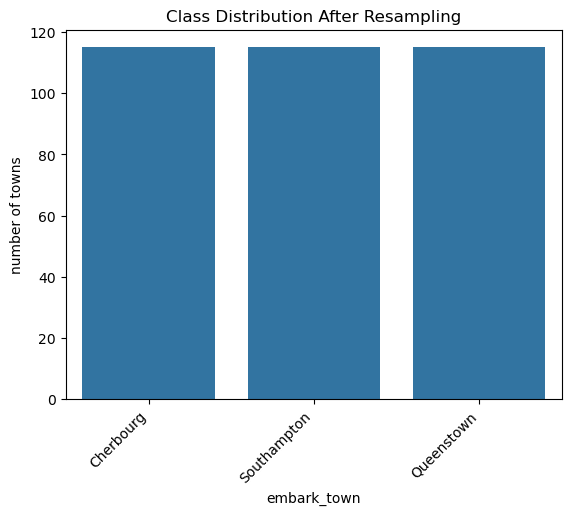

In [316]:
sns.countplot(x='embark_town',data=balanced_data)
plt.title('Class Distribution After Resampling')
plt.xlabel('embark_town')
plt.ylabel('number of towns')
plt.xticks(rotation=45,ha='right')
plt.show()

## Seperate Features and Labels

In [318]:
y = data["fare"]
x = data.drop("fare",axis=1)
y
x

,pclass,age,sibsp,parch,sex,embarked,who,embark_town,alive
1,1,38.0,1,0,female,C,woman,Cherbourg,yes
3,1,35.0,1,0,female,S,woman,Southampton,yes
6,1,54.0,0,0,male,S,man,Southampton,no
10,3,4.0,1,1,female,S,child,Southampton,yes
11,1,58.0,0,0,female,S,woman,Southampton,yes
...,...,...,...,...,...,...,...,...,...
871,1,47.0,1,1,female,S,woman,Southampton,yes
872,1,33.0,0,0,male,S,man,Southampton,no
879,1,56.0,0,1,female,C,woman,Cherbourg,yes
887,1,19.0,0,0,female,S,woman,Southampton,yes


## Train Test Split

In [320]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)
X_train

,pclass,age,sibsp,parch,fare,sex,embarked,who,alive
679,1,36.0,0,1,512.3292,male,C,man,yes
6,1,54.0,0,0,51.8625,male,S,man,no
268,1,58.0,0,1,153.4625,female,S,woman,yes
139,1,24.0,0,0,79.2000,male,C,man,no
307,1,17.0,1,0,108.9000,female,C,woman,yes
...,...,...,...,...,...,...,...,...,...
263,1,40.0,0,0,0.0000,male,S,man,no
558,1,39.0,1,1,79.6500,female,S,woman,yes
690,1,31.0,1,0,57.0000,male,S,man,yes
782,1,29.0,0,0,30.0000,male,S,man,no


In [321]:
X_train#here index can be changing

,pclass,age,sibsp,parch,fare,sex,embarked,who,alive
679,1,36.0,0,1,512.3292,male,C,man,yes
6,1,54.0,0,0,51.8625,male,S,man,no
268,1,58.0,0,1,153.4625,female,S,woman,yes
139,1,24.0,0,0,79.2000,male,C,man,no
307,1,17.0,1,0,108.9000,female,C,woman,yes
...,...,...,...,...,...,...,...,...,...
263,1,40.0,0,0,0.0000,male,S,man,no
558,1,39.0,1,1,79.6500,female,S,woman,yes
690,1,31.0,1,0,57.0000,male,S,man,yes
782,1,29.0,0,0,30.0000,male,S,man,no


In [322]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state =2)
X_train

,pclass,age,sibsp,parch,fare,sex,embarked,who,alive
174,1,56.0,0,0,30.6958,male,C,man,no
627,1,21.0,0,0,77.9583,female,S,woman,yes
248,1,37.0,1,1,52.5542,male,S,man,yes
599,1,49.0,1,0,56.9292,male,C,man,yes
484,1,25.0,1,0,91.0792,male,C,man,yes
...,...,...,...,...,...,...,...,...,...
252,1,62.0,0,0,26.5500,male,S,man,no
136,1,19.0,0,2,26.2833,female,S,woman,yes
356,1,22.0,0,1,55.0000,female,S,woman,yes
96,1,71.0,0,0,34.6542,male,C,man,no


In [323]:
y_train

174    30.6958
627    77.9583
248    52.5542
599    56.9292
484    91.0792
        ...   
252    26.5500
136    26.2833
356    55.0000
96     34.6542
809    53.1000
Name: fare, Length: 144, dtype: float64

# Encoding
* converting data into one form to another
* label encoding refers to converting the labels into numeric form so as to convert it to machine readable form

In [325]:
import numpy as np
import pandas as pd

In [326]:
df = pd.DataFrame(data)
df

,pclass,age,sibsp,parch,fare,sex,embarked,who,embark_town,alive
1,1,38.0,1,0,71.2833,female,C,woman,Cherbourg,yes
3,1,35.0,1,0,53.1000,female,S,woman,Southampton,yes
6,1,54.0,0,0,51.8625,male,S,man,Southampton,no
10,3,4.0,1,1,16.7000,female,S,child,Southampton,yes
11,1,58.0,0,0,26.5500,female,S,woman,Southampton,yes
...,...,...,...,...,...,...,...,...,...,...
871,1,47.0,1,1,52.5542,female,S,woman,Southampton,yes
872,1,33.0,0,0,5.0000,male,S,man,Southampton,no
879,1,56.0,0,1,83.1583,female,C,woman,Cherbourg,yes
887,1,19.0,0,0,30.0000,female,S,woman,Southampton,yes


In [327]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
label_enc = LabelEncoder()
df['sex_encoded']= label_enc.fit_transform(df['sex'])
df

,pclass,age,sibsp,parch,fare,sex,embarked,who,embark_town,alive,sex_encoded
1,1,38.0,1,0,71.2833,female,C,woman,Cherbourg,yes,0
3,1,35.0,1,0,53.1000,female,S,woman,Southampton,yes,0
6,1,54.0,0,0,51.8625,male,S,man,Southampton,no,1
10,3,4.0,1,1,16.7000,female,S,child,Southampton,yes,0
11,1,58.0,0,0,26.5500,female,S,woman,Southampton,yes,0
...,...,...,...,...,...,...,...,...,...,...,...
871,1,47.0,1,1,52.5542,female,S,woman,Southampton,yes,0
872,1,33.0,0,0,5.0000,male,S,man,Southampton,no,1
879,1,56.0,0,1,83.1583,female,C,woman,Cherbourg,yes,0
887,1,19.0,0,0,30.0000,female,S,woman,Southampton,yes,0


In [328]:
label_enc= LabelEncoder()
df['embarked_encoded']= label_enc.fit_transform(df['embarked'])
df

,pclass,age,sibsp,parch,fare,sex,embarked,who,embark_town,alive,sex_encoded,embarked_encoded
1,1,38.0,1,0,71.2833,female,C,woman,Cherbourg,yes,0,0
3,1,35.0,1,0,53.1000,female,S,woman,Southampton,yes,0,2
6,1,54.0,0,0,51.8625,male,S,man,Southampton,no,1,2
10,3,4.0,1,1,16.7000,female,S,child,Southampton,yes,0,2
11,1,58.0,0,0,26.5500,female,S,woman,Southampton,yes,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,47.0,1,1,52.5542,female,S,woman,Southampton,yes,0,2
872,1,33.0,0,0,5.0000,male,S,man,Southampton,no,1,2
879,1,56.0,0,1,83.1583,female,C,woman,Cherbourg,yes,0,0
887,1,19.0,0,0,30.0000,female,S,woman,Southampton,yes,0,2


In [329]:
label_enc= LabelEncoder()
df['town_encoded']= label_enc.fit_transform(df['embark_town'])
df

,pclass,age,sibsp,parch,fare,sex,embarked,who,embark_town,alive,sex_encoded,embarked_encoded,town_encoded
1,1,38.0,1,0,71.2833,female,C,woman,Cherbourg,yes,0,0,0
3,1,35.0,1,0,53.1000,female,S,woman,Southampton,yes,0,2,2
6,1,54.0,0,0,51.8625,male,S,man,Southampton,no,1,2,2
10,3,4.0,1,1,16.7000,female,S,child,Southampton,yes,0,2,2
11,1,58.0,0,0,26.5500,female,S,woman,Southampton,yes,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,47.0,1,1,52.5542,female,S,woman,Southampton,yes,0,2,2
872,1,33.0,0,0,5.0000,male,S,man,Southampton,no,1,2,2
879,1,56.0,0,1,83.1583,female,C,woman,Cherbourg,yes,0,0,0
887,1,19.0,0,0,30.0000,female,S,woman,Southampton,yes,0,2,2


In [330]:
who_order = ['child','woman','man']
ordinal_enc= OrdinalEncoder(categories=[who_order])
df['who_encoded']=ordinal_enc.fit_transform(df[['who']])
df

,pclass,age,sibsp,parch,fare,sex,embarked,who,embark_town,alive,sex_encoded,embarked_encoded,town_encoded,who_encoded
1,1,38.0,1,0,71.2833,female,C,woman,Cherbourg,yes,0,0,0,1.0
3,1,35.0,1,0,53.1000,female,S,woman,Southampton,yes,0,2,2,1.0
6,1,54.0,0,0,51.8625,male,S,man,Southampton,no,1,2,2,2.0
10,3,4.0,1,1,16.7000,female,S,child,Southampton,yes,0,2,2,0.0
11,1,58.0,0,0,26.5500,female,S,woman,Southampton,yes,0,2,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,47.0,1,1,52.5542,female,S,woman,Southampton,yes,0,2,2,1.0
872,1,33.0,0,0,5.0000,male,S,man,Southampton,no,1,2,2,2.0
879,1,56.0,0,1,83.1583,female,C,woman,Cherbourg,yes,0,0,0,1.0
887,1,19.0,0,0,30.0000,female,S,woman,Southampton,yes,0,2,2,1.0


# One Hot Encoding

In [332]:
sibsp_onehot = pd.get_dummies(df['sibsp'],prefix='sib')
sibsp_onehot.head()

,sib_0,sib_1,sib_2,sib_3
1,False,True,False,False
3,False,True,False,False
6,True,False,False,False
10,False,True,False,False
11,True,False,False,False


In [339]:
sibsp_onehot = pd.get_dummies(df['sibsp'],prefix='sib',dtype=int)
sibsp_onehot.head()

,sib_0,sib_1,sib_2,sib_3
1,0,1,0,0
3,0,1,0,0
6,1,0,0,0
10,0,1,0,0
11,1,0,0,0


In [340]:
sibsp_onehot = pd.get_dummies(df,columns=['sibsp'],prefix='sib',dtype=int,drop_first=True)
sibsp_onehot

,pclass,age,parch,fare,sex,embarked,who,embark_town,alive,sex_encoded,embarked_encoded,town_encoded,who_encoded,sib_1,sib_2,sib_3
1,1,38.0,0,71.2833,female,C,woman,Cherbourg,yes,0,0,0,1.0,1,0,0
3,1,35.0,0,53.1000,female,S,woman,Southampton,yes,0,2,2,1.0,1,0,0
6,1,54.0,0,51.8625,male,S,man,Southampton,no,1,2,2,2.0,0,0,0
10,3,4.0,1,16.7000,female,S,child,Southampton,yes,0,2,2,0.0,1,0,0
11,1,58.0,0,26.5500,female,S,woman,Southampton,yes,0,2,2,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,47.0,1,52.5542,female,S,woman,Southampton,yes,0,2,2,1.0,1,0,0
872,1,33.0,0,5.0000,male,S,man,Southampton,no,1,2,2,2.0,0,0,0
879,1,56.0,1,83.1583,female,C,woman,Cherbourg,yes,0,0,0,1.0,0,0,0
887,1,19.0,0,30.0000,female,S,woman,Southampton,yes,0,2,2,1.0,0,0,0


In [343]:
from sklearn.preprocessing import OneHotEncoder

In [349]:
one_hot_enc = OneHotEncoder(sparse_output=False)
pclass_encoded = one_hot_enc.fit_transform(df[['pclass']])
pclass_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [350]:
one_hot_enc= pd.DataFrame(pclass_encoded,columns=one_hot_enc.get_feature_names_out(['pclass']))
one_hot_enc

,pclass_1,pclass_2,pclass_3
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
...,...,...,...
176,1.0,0.0,0.0
177,1.0,0.0,0.0
178,1.0,0.0,0.0
179,1.0,0.0,0.0


In [400]:
one_hot_enc= pd.DataFrame(pclass_encoded,columns=['pc1','pc2','pc3'])
one_hot_enc

,pc1,pc2,pc3
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
...,...,...,...
176,1.0,0.0,0.0
177,1.0,0.0,0.0
178,1.0,0.0,0.0
179,1.0,0.0,0.0


In [404]:
new_data = pd.concat([df,one_hot_enc],axis=1)
new_data.head()

,pclass,age,sibsp,parch,fare,sex,embarked,who,embark_town,alive,sex_encoded,embarked_encoded,town_encoded,who_encoded,pc1,pc2,pc3
1,1.0,38.0,1.0,0.0,71.2833,female,C,woman,Cherbourg,yes,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,35.0,1.0,0.0,53.1000,female,S,woman,Southampton,yes,0.0,2.0,2.0,1.0,0.0,0.0,1.0
6,1.0,54.0,0.0,0.0,51.8625,male,S,man,Southampton,no,1.0,2.0,2.0,2.0,1.0,0.0,0.0
10,3.0,4.0,1.0,1.0,16.7000,female,S,child,Southampton,yes,0.0,2.0,2.0,0.0,1.0,0.0,0.0
11,1.0,58.0,0.0,0.0,26.5500,female,S,woman,Southampton,yes,0.0,2.0,2.0,1.0,0.0,1.0,0.0


In [406]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [408]:
std_scaler = StandardScaler()
df['fare_std_scaled']= std_scaler.fit_transform(df[['fare']])
df

,pclass,age,sibsp,parch,fare,sex,embarked,who,embark_town,alive,sex_encoded,embarked_encoded,town_encoded,who_encoded,fare_std_scaled
1,1,38.0,1,0,71.2833,female,C,woman,Cherbourg,yes,0,0,0,1.0,-0.100534
3,1,35.0,1,0,53.1000,female,S,woman,Southampton,yes,0,2,2,1.0,-0.338263
6,1,54.0,0,0,51.8625,male,S,man,Southampton,no,1,2,2,2.0,-0.354442
10,3,4.0,1,1,16.7000,female,S,child,Southampton,yes,0,2,2,0.0,-0.814159
11,1,58.0,0,0,26.5500,female,S,woman,Southampton,yes,0,2,2,1.0,-0.685379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,47.0,1,1,52.5542,female,S,woman,Southampton,yes,0,2,2,1.0,-0.345399
872,1,33.0,0,0,5.0000,male,S,man,Southampton,no,1,2,2,2.0,-0.967125
879,1,56.0,0,1,83.1583,female,C,woman,Cherbourg,yes,0,0,0,1.0,0.054720
887,1,19.0,0,0,30.0000,female,S,woman,Southampton,yes,0,2,2,1.0,-0.640274


In [410]:
minmax_scaler = MinMaxScaler()
df['fare_min_max_scaled']= minmax_scaler.fit_transform(df[['fare']])
df

,pclass,age,sibsp,parch,fare,sex,embarked,who,embark_town,alive,sex_encoded,embarked_encoded,town_encoded,who_encoded,fare_std_scaled,fare_min_max_scaled
1,1,38.0,1,0,71.2833,female,C,woman,Cherbourg,yes,0,0,0,1.0,-0.100534,0.139136
3,1,35.0,1,0,53.1000,female,S,woman,Southampton,yes,0,2,2,1.0,-0.338263,0.103644
6,1,54.0,0,0,51.8625,male,S,man,Southampton,no,1,2,2,2.0,-0.354442,0.101229
10,3,4.0,1,1,16.7000,female,S,child,Southampton,yes,0,2,2,0.0,-0.814159,0.032596
11,1,58.0,0,0,26.5500,female,S,woman,Southampton,yes,0,2,2,1.0,-0.685379,0.051822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,47.0,1,1,52.5542,female,S,woman,Southampton,yes,0,2,2,1.0,-0.345399,0.102579
872,1,33.0,0,0,5.0000,male,S,man,Southampton,no,1,2,2,2.0,-0.967125,0.009759
879,1,56.0,0,1,83.1583,female,C,woman,Cherbourg,yes,0,0,0,1.0,0.054720,0.162314
887,1,19.0,0,0,30.0000,female,S,woman,Southampton,yes,0,2,2,1.0,-0.640274,0.058556


In [412]:
minmax_scaler = MinMaxScaler(feature_range=(0,1))
df['fare_min_max_scaled']= minmax_scaler.fit_transform(df[['fare']])
df

,pclass,age,sibsp,parch,fare,sex,embarked,who,embark_town,alive,sex_encoded,embarked_encoded,town_encoded,who_encoded,fare_std_scaled,fare_min_max_scaled
1,1,38.0,1,0,71.2833,female,C,woman,Cherbourg,yes,0,0,0,1.0,-0.100534,0.139136
3,1,35.0,1,0,53.1000,female,S,woman,Southampton,yes,0,2,2,1.0,-0.338263,0.103644
6,1,54.0,0,0,51.8625,male,S,man,Southampton,no,1,2,2,2.0,-0.354442,0.101229
10,3,4.0,1,1,16.7000,female,S,child,Southampton,yes,0,2,2,0.0,-0.814159,0.032596
11,1,58.0,0,0,26.5500,female,S,woman,Southampton,yes,0,2,2,1.0,-0.685379,0.051822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,47.0,1,1,52.5542,female,S,woman,Southampton,yes,0,2,2,1.0,-0.345399,0.102579
872,1,33.0,0,0,5.0000,male,S,man,Southampton,no,1,2,2,2.0,-0.967125,0.009759
879,1,56.0,0,1,83.1583,female,C,woman,Cherbourg,yes,0,0,0,1.0,0.054720,0.162314
887,1,19.0,0,0,30.0000,female,S,woman,Southampton,yes,0,2,2,1.0,-0.640274,0.058556


In [414]:
data1 = data[['pclass','age','sibsp','parch','fare']]
data1

,pclass,age,sibsp,parch,fare
1,1,38.0,1,0,71.2833
3,1,35.0,1,0,53.1000
6,1,54.0,0,0,51.8625
10,3,4.0,1,1,16.7000
11,1,58.0,0,0,26.5500
...,...,...,...,...,...
871,1,47.0,1,1,52.5542
872,1,33.0,0,0,5.0000
879,1,56.0,0,1,83.1583
887,1,19.0,0,0,30.0000


In [416]:
numerical_colms=['pclass','age','sibsp','parch','fare']
scaled_data1 = std_scaler.fit_transform(data1[numerical_colms])
scaled_data1

array([[-3.74594091e-01,  1.47791933e-01,  8.23496020e-01,
        -6.36615664e-01, -1.00533964e-01],
       [-3.74594091e-01, -4.39301263e-02,  8.23496020e-01,
        -6.36615664e-01, -3.38263274e-01],
       [-3.74594091e-01,  1.17030958e+00, -7.29137101e-01,
        -6.36615664e-01, -3.54442406e-01],
       [ 3.49977908e+00, -2.02505807e+00,  8.23496020e-01,
         6.87837614e-01, -8.14158566e-01],
       [-3.74594091e-01,  1.42593899e+00, -7.29137101e-01,
        -6.36615664e-01, -6.85379208e-01],
       [ 1.56259249e+00, -1.07837479e-01, -7.29137101e-01,
        -6.36615664e-01, -8.62532538e-01],
       [-3.74594091e-01, -4.91281597e-01, -7.29137101e-01,
        -6.36615664e-01, -5.68366492e-01],
       [-3.74594091e-01, -1.06644777e+00,  3.92876226e+00,
         2.01229089e+00,  2.40597909e+00],
       [-3.74594091e-01,  8.50772815e-01,  8.23496020e-01,
        -6.36615664e-01, -2.93340142e-02],
       [-3.74594091e-01,  1.87329046e+00, -7.29137101e-01,
         6.87837614e-01

In [418]:
numerical_colms=['pclass','age','sibsp','parch','fare']
scaled_data1 = std_scaler.fit_transform(data1[numerical_colms])
data1[numerical_colms] = scaled_data1
data1[numerical_colms] 

C:\Users\sulai\AppData\Local\Temp\ipykernel_25300\68456716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[numerical_colms] = scaled_data1


,pclass,age,sibsp,parch,fare
1,-0.374594,0.147792,0.823496,-0.636616,-0.100534
3,-0.374594,-0.043930,0.823496,-0.636616,-0.338263
6,-0.374594,1.170310,-0.729137,-0.636616,-0.354442
10,3.499779,-2.025058,0.823496,0.687838,-0.814159
11,-0.374594,1.425939,-0.729137,-0.636616,-0.685379
...,...,...,...,...,...
871,-0.374594,0.722958,0.823496,0.687838,-0.345399
872,-0.374594,-0.171745,-0.729137,-0.636616,-0.967125
879,-0.374594,1.298124,-0.729137,0.687838,0.054720
887,-0.374594,-1.066448,-0.729137,-0.636616,-0.640274


In [420]:
data2 = data[['pclass','age','sibsp','parch','fare']]
data2

,pclass,age,sibsp,parch,fare
1,1,38.0,1,0,71.2833
3,1,35.0,1,0,53.1000
6,1,54.0,0,0,51.8625
10,3,4.0,1,1,16.7000
11,1,58.0,0,0,26.5500
...,...,...,...,...,...
871,1,47.0,1,1,52.5542
872,1,33.0,0,0,5.0000
879,1,56.0,0,1,83.1583
887,1,19.0,0,0,30.0000


In [422]:
numerical_colms=['pclass','age','sibsp','parch','fare']
scaled_data2 = std_scaler.fit_transform(data2[numerical_colms])
data2[numerical_colms] = scaled_data2
data2[numerical_colms] 

C:\Users\sulai\AppData\Local\Temp\ipykernel_25300\3789546585.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[numerical_colms] = scaled_data2


,pclass,age,sibsp,parch,fare
1,-0.374594,0.147792,0.823496,-0.636616,-0.100534
3,-0.374594,-0.043930,0.823496,-0.636616,-0.338263
6,-0.374594,1.170310,-0.729137,-0.636616,-0.354442
10,3.499779,-2.025058,0.823496,0.687838,-0.814159
11,-0.374594,1.425939,-0.729137,-0.636616,-0.685379
...,...,...,...,...,...
871,-0.374594,0.722958,0.823496,0.687838,-0.345399
872,-0.374594,-0.171745,-0.729137,-0.636616,-0.967125
879,-0.374594,1.298124,-0.729137,0.687838,0.054720
887,-0.374594,-1.066448,-0.729137,-0.636616,-0.640274
